In [1]:
import os, sys
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/preprocessed_data.csv", index_col=0)

In [4]:
df.head()

,Close BND,Close SPY,Close TSLA,High BND,High SPY,High TSLA,Low BND,Low SPY,Low TSLA,Open BND,Open SPY,Open TSLA,Volume BND,Volume SPY,Volume TSLA
Date,,,,,,,,,,,,,,,
2015-01-02,0.041993,0.034865,0.010723,0.039220,0.035210,0.009519,0.033975,0.037304,0.010743,0.030314,0.037569,0.011513,2218800.0,121465900.0,71466000.0
2015-01-05,0.052701,0.027983,0.009416,0.049470,0.030554,0.008578,0.046467,0.032045,0.009835,0.044122,0.033475,0.010324,5820100.0,169632600.0,80527500.0
2015-01-06,0.063415,0.024459,0.009584,0.069979,0.027493,0.008257,0.061195,0.027418,0.009397,0.057044,0.029621,0.009682,3887600.0,209151400.0,93928500.0
2015-01-07,0.065648,0.029078,0.009538,0.065522,0.027493,0.008338,0.062089,0.031171,0.010225,0.061945,0.028380,0.010153,2433400.0,125346700.0,44526000.0
2015-01-08,0.059847,0.035737,0.009491,0.057945,0.033874,0.008201,0.058520,0.036951,0.010259,0.060610,0.033178,0.010075,1873400.0,147217800.0,51637500.0


In [5]:
# Assign ticker to TSLA
ticker = "TSLA"

"""Import and Instantiate class"""
from scripts.forecasting_future_market_trends import ForecastFutureMarkets
future_market_forecaster = ForecastFutureMarkets(ticker, "../data/preprocessed_data.csv")

2025-03-03 13:43:54.000073: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 13:44:00.335515: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 13:44:00.341306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 13:44:10.876490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Class instantiated!


In [6]:
# Load all models
future_market_forecaster.load_all_models()


Loading models...
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/arima_model.pkl
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/sarima_model.pkl
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/optimized_arima_model.pkl
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/lstm_model.h5



In [7]:
# Generate forecasts
forecast_arima = future_market_forecaster.forecast_arima()
print(f"\nforecast_arima data types:\n {forecast_arima.dtypes}")
forecast_sarima, confidence_interval = future_market_forecaster.forecast_sarima()
print(f"forecast_sarima data:\n {forecast_sarima.head}")
print(f"\nforecast_SARIMA conf intervales .. {confidence_interval.head()}")

forecast_lstm = future_market_forecaster.forecast_lstm()
print(f"\nforecast_lstm data :\n {forecast_lstm.head()}")

/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasting using ARIMA completed successfully!
Data forecast by ARIMA
2535    0.829806
2536    0.830753
2537    0.829962
2538    0.831151
2539    0.830525
Name: ARIMA Forecast, dtype: float64


forecast_arima data types:
 float64
Forecast by SARIMA ...predicted mean
2535    0.864264
2536    0.884959
2537    0.844970
2538    0.841082
2539    0.823094
          ...   
2710    0.500199
2711    0.474700
2712    0.476423
2713    0.463902
2714    0.485717
Name: predicted_mean, Length: 180, dtype: float64
Confidence interval by SARIMA


/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


      lower Close TSLA  upper Close TSLA
2535          0.833438          0.895090
2536          0.841909          0.928009
2537          0.791608          0.898331
2538          0.778943          0.903220
2539          0.752325          0.893864
...                ...               ...
2710         -2.121074          3.121472
2711         -2.167204          3.116604
2712         -2.185943          3.138789
2713         -2.218774          3.146577
2714         -2.217115          3.188549

[180 rows x 2 columns]
Forecasting using SARIMA completed successfully!

forecast_sarima data:
 <bound method NDFrame.head of 2535    0.864264
2536    0.884959
2537    0.844970
2538    0.841082
2539    0.823094
          ...   
2710    0.500199
2711    0.474700
2712    0.476423
2713    0.463902
2714    0.485717
Name: predicted_mean, Length: 180, dtype: float64>

forecast_SARIMA conf intervales ..       lower Close TSLA  upper Close TSLA
2535          0.833438          0.895090
2536          0.841909   

Forecast by SARIMA ...predicted mean
2535    0.864264
2536    0.884959
2537    0.844970
2538    0.841082
2539    0.823094
          ...   
2710    0.500199
2711    0.474700
2712    0.476423
2713    0.463902
2714    0.485717
Name: predicted_mean, Length: 180, dtype: float64
Confidence interval by SARIMA
      lower Close TSLA  upper Close TSLA
2535          0.833438          0.895090
2536          0.841909          0.928009
2537          0.791608          0.898331
2538          0.778943          0.903220
2539          0.752325          0.893864
...                ...               ...
2710         -2.121074          3.121472
2711         -2.167204          3.116604
2712         -2.185943          3.138789
2713         -2.218774          3.146577
2714         -2.217115          3.188549

[180 rows x 2 columns]
Forecasting using SARIMA completed successfully!



/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


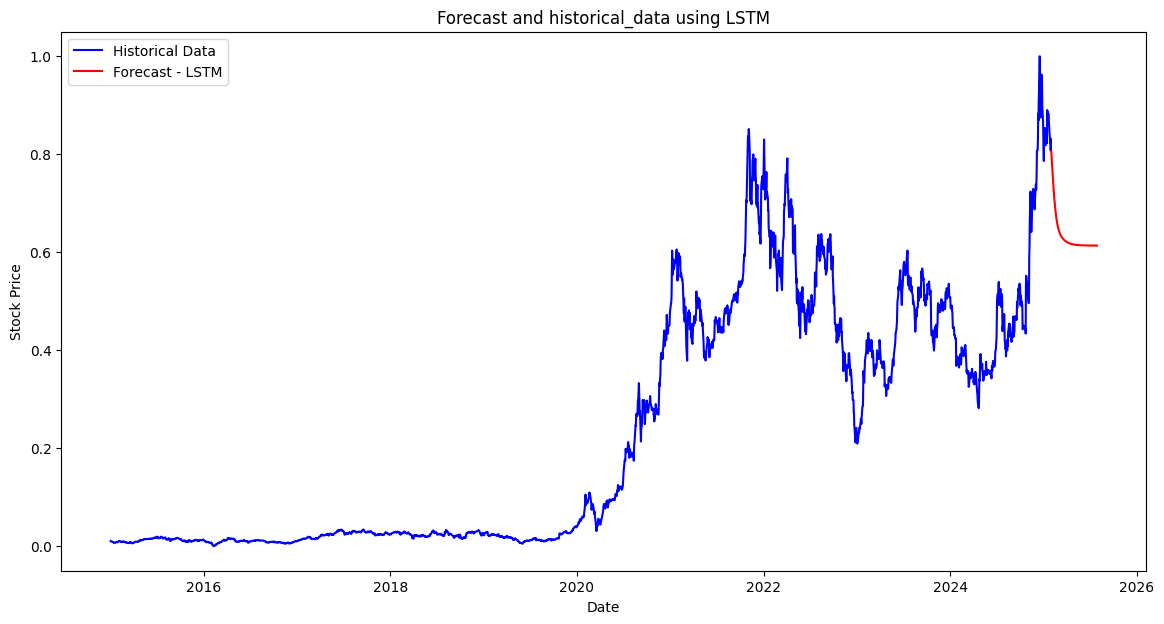

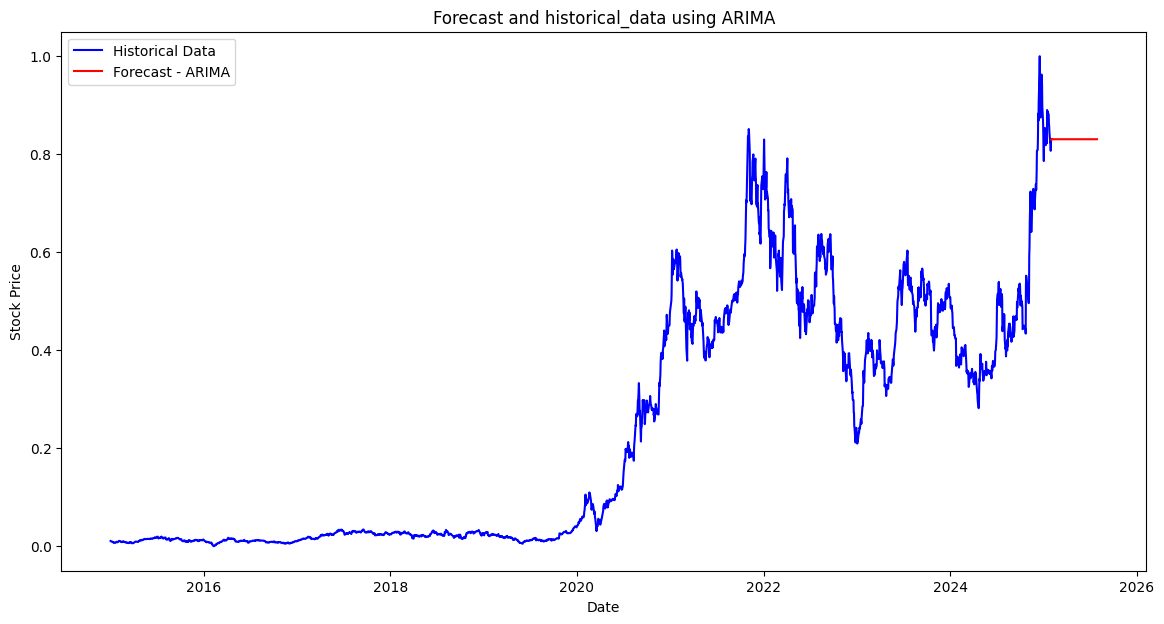

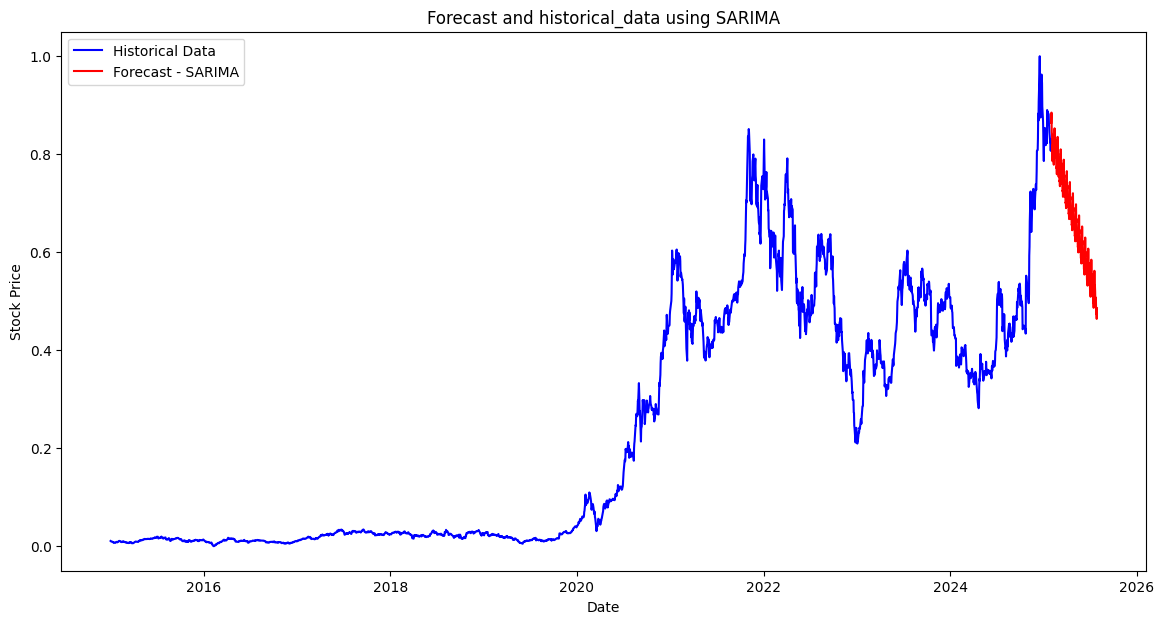

In [8]:
# Ensure SARIMA forecast index is a datetime index
sarima_forecast, sarima_conf_int = future_market_forecaster.forecast_sarima(steps=180)

# Generate appropriate date index
sarima_index = pd.date_range(start=future_market_forecaster.data.index[-1], periods=len(sarima_forecast) + 1, freq='D')[1:]

# Convert SARIMA forecast into a DataFrame with correct index
sarima_forecast = pd.Series(sarima_forecast.values, index=sarima_index)

# Now call the visualization function
future_market_forecaster.visualize_forecast(forecast_lstm, "LSTM")
future_market_forecaster.visualize_forecast(forecast_arima, "ARIMA")
future_market_forecaster.visualize_forecast(sarima_forecast, "SARIMA")


In [9]:
# Analyze forecast

# Ensure SARIMA forecast index is a datetime index
sarima_forecast, sarima_conf_int = future_market_forecaster.forecast_sarima(steps=180)

# Generate appropriate date index
sarima_index = pd.date_range(start=future_market_forecaster.data.index[-1], periods=len(sarima_forecast) + 1, freq='D')[1:]

# Convert SARIMA forecast into a DataFrame with correct index
sarima_forecast = pd.Series(sarima_forecast.values, index=sarima_index)
sarima_conf_int.index = sarima_index  # Align confidence intervals

# Now call the analysis function
future_market_forecaster.analyze_forecast(forecast_arima)
future_market_forecaster.analyze_forecast(sarima_forecast, sarima_conf_int)
future_market_forecaster.analyze_forecast(forecast_lstm)


Forecast by SARIMA ...predicted mean
2535    0.864264
2536    0.884959
2537    0.844970
2538    0.841082
2539    0.823094
          ...   
2710    0.500199
2711    0.474700
2712    0.476423
2713    0.463902
2714    0.485717
Name: predicted_mean, Length: 180, dtype: float64
Confidence interval by SARIMA
      lower Close TSLA  upper Close TSLA
2535          0.833438          0.895090
2536          0.841909          0.928009
2537          0.791608          0.898331
2538          0.778943          0.903220
2539          0.752325          0.893864
...                ...               ...
2710         -2.121074          3.121472
2711         -2.167204          3.116604
2712         -2.185943          3.138789
2713         -2.218774          3.146577
2714         -2.217115          3.188549

[180 rows x 2 columns]
Forecasting using SARIMA completed successfully!

Trend Analysis: The trend is Upward.
Market Opportunity: Price increase expected.
Trend Analysis: The trend is Downward.
Volatilit

/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
